In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season, Experiments, Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_unstructured_rotated_grid, plot_contourf_rotated_grid


/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:17: AccessorRegistrationWarning: registration of accessor <class 'src.xarray_util.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("get")


## Settings

In [14]:
exp_ICON_ERA5=Experiments.ICON_ERA5.value
exp_ERA5=Experiments.ERA5.value

input_path_ICON_ERA5= exp_ICON_ERA5.path_IVT_tracking
input_path_ERA5= exp_ERA5.path_IVT_tracking


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'

first_year = 1998
last_year = 2022
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [3]:
IVT_objs_ICON_ERA5 = load_tracking_objects(input_path_ICON_ERA5,
                                      input_file_name_temp_ICON_ERA5,
                                      type_, first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ICON_ERA5,
                                      
                                     
                                      )
    
    

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ICON_DRIVENBY_ERA5_remapped_3x/Object_container_1998-2022 exists. Loading...


In [15]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ERA5,
                                      
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1998-2022 exists. Loading...


Season.DJF
Season.MAM
Season.JJA
Season.SON


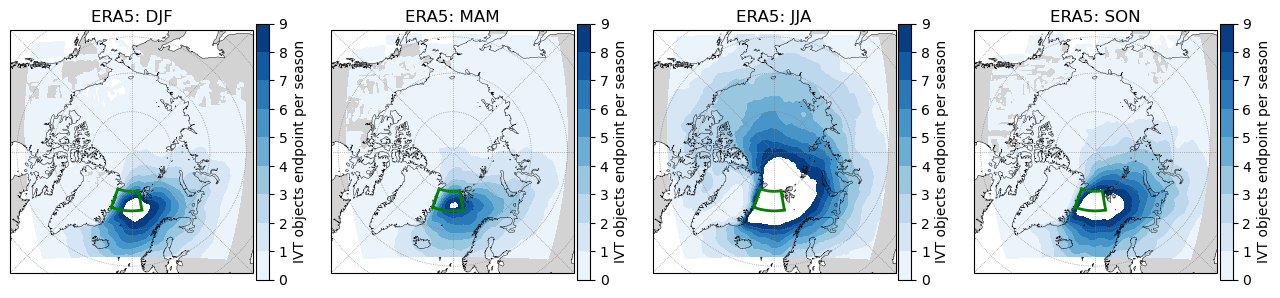

In [37]:
fig = plt.figure(figsize=(13,3))
subplts = (1,4)
levels=np.arange(0,10,1)
for  season_,i in zip(Season,[0,1,2,3]):
    
    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.3, select_last_timesteps=True)

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=24)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.GREENLAND_SEA : 'green'},
                                  cbar=True)
        
   
    
plt.tight_layout()

Season.DJF
Season.MAM
Season.JJA
Season.SON


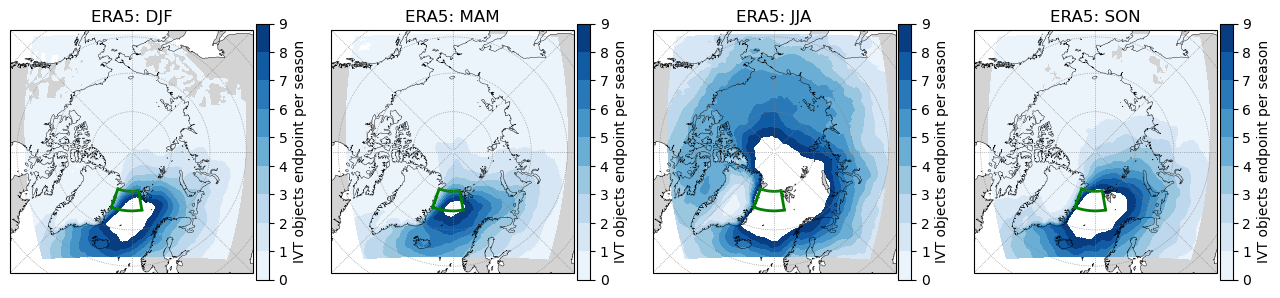

Season.DJF
Season.MAM
Season.JJA
Season.SON


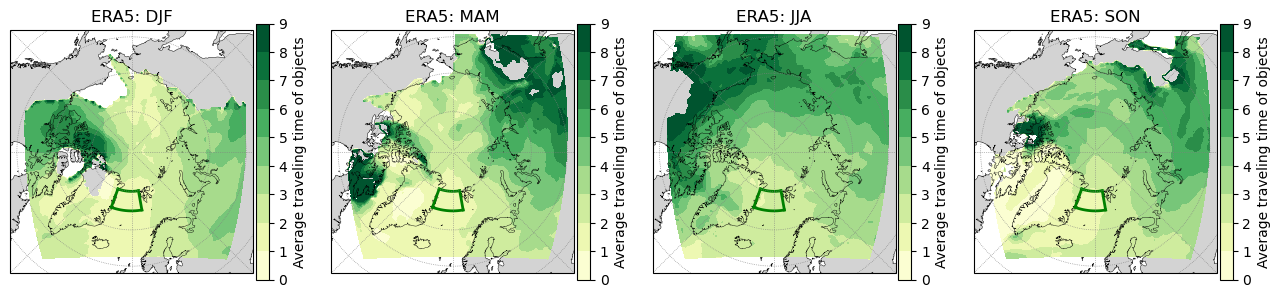

In [16]:
fig = plt.figure(figsize=(13,3))
subplts = (1,4)
levels=np.arange(0,10,1)
for  season_,i in zip(Season,[0,1,2,3]):
    
    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.3, select_last_timesteps=True)

    lon,lat,z = calculate_average_ellapsed_time(IVTobjs_sel_ERA5, normalization_factor=24)
    
   

    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                   cmap="YlGn",
                                  cbar_label = "Average traveling time of objects",
                                  plot_domains={Domains.GREENLAND_SEA : 'green'},
                                  cbar=True)
        
   
    
plt.tight_layout()


In [14]:
b= IVT_objs_ERA5.sel_by_domain(Domains.NORTH_ATLANTIC,type_="anytime", domain_frac = 0.3, select_last_timesteps=True)

In [13]:
max(z) *23

11.340277777777779

In [28]:
lon,z1,z = calculate_average_ellapsed_time(IVTobjs_sel_ERA5, normalization_factor=24)


/work/aa0238/a271093/Scripts/MOAAP/src/utils.py:140: RuntimeWarning: invalid value encountered in scalar divide
  z =[i/j/normalization_factor for i,j in zip(z_time,z_mean)]


In [42]:
max(z1)

15175

In [54]:
max(z)

5.041666666666667

In [45]:
a = [i/(j+0.0000000001) if j !=0 else 0 for i,j in zip(z1,z) ]

In [47]:
max(a)

6681.9999993318

In [34]:
from src.Variable_classes import *
from src.decorators import measure_time_func_lines

In [35]:
@measure_time_func_lines
def f():
    for i in range(10000):
        a1 = IWV(5.4)


In [36]:
f()

Timer unit: 1e-09 s

Total time: 3.30025 s
File: /tmp/ipykernel_109562/126203080.py
Function: f at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           @measure_time_func_lines
     2                                           def f():
     3     10000    2147140.0    214.7      0.1      for i in range(10000):
     4     10000 3298105009.0 329810.5     99.9          a1 = IWV(5.4)



In [27]:
a1

IWV(value=5)

In [28]:
IWV.bins

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
